In [13]:
!pip install youtube_dl --quiet

In [14]:
import youtube_dl
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def download_geeksforgeeks_videos():
    start_date = (datetime.now() - timedelta(days=180)).strftime('%Y-%m-%d')
    end_date = datetime.now().strftime('%Y-%m-%d')
    ydl_opts = {
        'quiet': True,
        'extract_flat': True,
        'dateafter': start_date,
        'force_generic_extractor': True,
        'force-ipv4': True,
    }

    video_data = []

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        playlist_url = 'https://www.youtube.com/@GeeksforGeeksVideos/videos'
        info = ydl.extract_info(playlist_url, download=False)
        videos = info['entries']

        if videos:
            for video in videos:
                video_data.append({
                    'Title': video['title'],
                    'Views': video['view_count'],
                    'Length': video['duration'],
                    'Link': video['url']
                })

    return pd.DataFrame(video_data), start_date, end_date


1) Number of videos in the past 6 months from the start date. Must mention the dates in the solution.\
2) Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link

In [16]:
df, start_date, end_date = download_geeksforgeeks_videos()

In [22]:
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Number of videos uploaded in the past 6 months: {len(df)}")

Start Date: 2023-02-08
End Date: 2023-08-07
Number of videos uploaded in the past 6 months: 1686


In [27]:
pd.set_option('display.max_colwidth', None)

3) Name the most viewed topics in the past 6 months.

In [28]:
df.sort_values('Views', ascending=False)['Title']

436     Complete Interview Preparation to Crack Coding Interviews | GeeksforGeeks
1628                                                    Heap Sort | GeeksforGeeks
1627                                                   Quick Sort | GeeksforGeeks
245      Are You Prepared Enough? | GeeksforGeeks feat. Manoj Bajpayee x Dial 100
1630                                               Insertion Sort | GeeksforGeeks
                                          ...                                    
161           Meet Some More Winners Of Bi-Wizard Coding Contests | GeeksforGeeks
742                          Functions In Go Programming Language | GeeksforGeeks
750                     Go Programming Language | Variables In GO | GeeksforGeeks
845               Divisibility by 64 with removal of bits allowed | GeeksforGeeks
772                        Downloading and Storing Packages In Go | GeeksforGeeks
Name: Title, Length: 1686, dtype: object

4) Name the topics with the highest video length.

In [29]:
df.sort_values('Length', ascending=False)['Title']

229                         Creating Chatting Application in Android Studio Using Kotlin | GeeksforGeeks
240    User Authentication and CRUD Operation with Firebase Realtime Database in Android | GeeksforGeeks
150                                         DSA Self-Paced Course Preview | Sandeep Jain | GeeksforGeeks
5                                                Data Analysis Masterclass | Geek-A-Thon | GeeksforGeeks
290                                            How to Make a News App in Android Studio? | GeeksforGeeks
                                                     ...                                                
74                               ⛄ Merry Christmas, Geeks! ⛄ | Keep Coding Keep Learning | GeeksforGeeks
166                                                               Campus Mantri Program by GeeksforGeeks
85                                                                                      Happy Dussehra 🔥
13                                                 Geek

5) Make a comparison between the number of views and video length using a Graph.

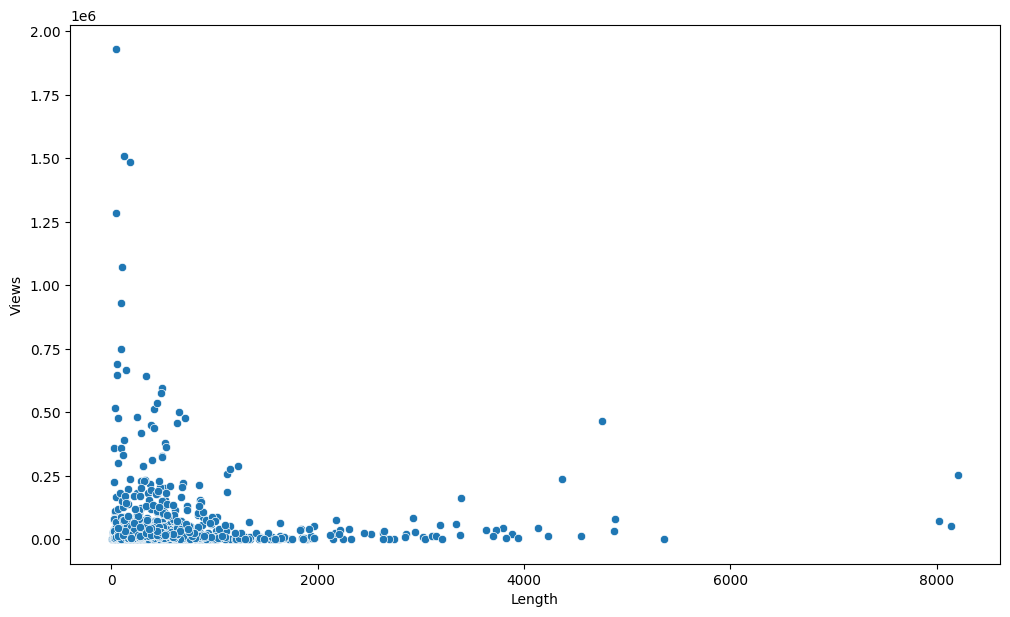

In [30]:
df['Length(mins)'] = df['Length']/60
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x = 'Length', y = 'Views')
plt.show()

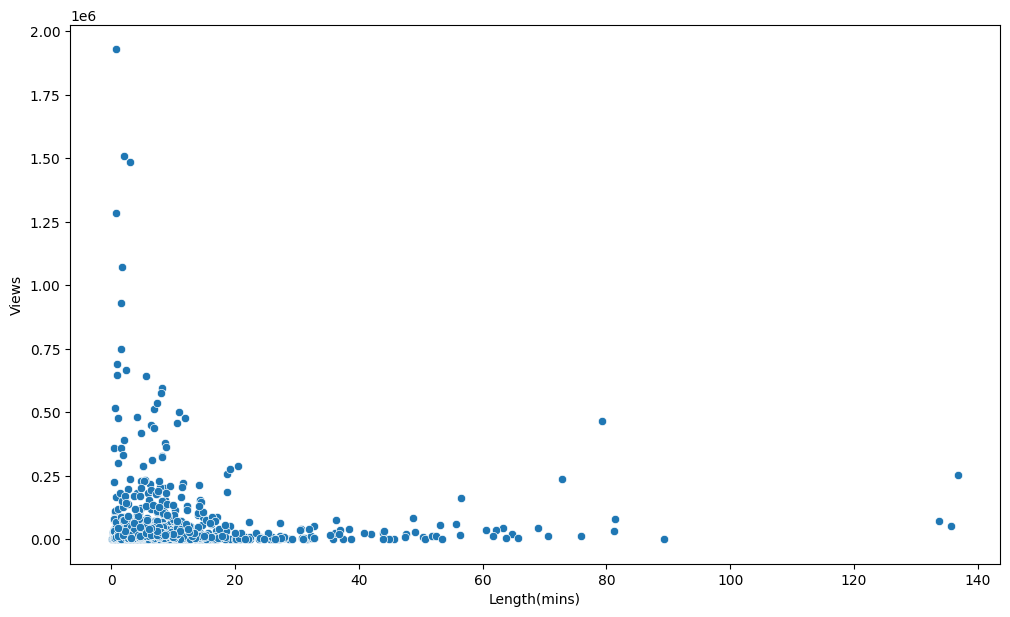

In [31]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x = 'Length(mins)', y = 'Views')
plt.show()

Based on the graph, it is clear that GeeksforGeeks (GFG) has uploaded a higher number of short-duration videos compared to long-duration videos over the past 6 months. Interestingly, some of these shorter videos have received a substantially higher number of views.